# Przyrost fermentacji drożdży podczas fermentacji napojów alkoholowych

## 1. Wstęp
Napoje alkoholowe - każdemu znane, przez wielu uwielbiane. Nie od dziś stanowią one symbole wielu okazji, od eleganckiego obiadu, po świętowanie nowego roku. Aczkolwiek, pewnie nie każdy sobie zdaje sprawę z tego, że za ten dobytek kulturowy odpowiedzialne są drożdże. Ta praca będzie się skupiać na tych właśnie mikroorganizmach, i na tym jak one rozwijają się podczas fermentacji alkoholowej. Proces ten jest podobny w każdym ze znanych napojów z tej kategorii. Dlatego w tej pracy skupimy się na prawdopodobnie najpopularniejszym z nich, czyli piwie.

### 1.1 Jak wygląda proces ważenia piwa?
Proces warzenia piwa, niezwykle ważny dla rozwoju cywilizacji, zaczyna się od słodu - wykiełkowane nasiona zbóż, zawierające enzymy rozbijające skrobię, występującą naturalnie w zbożu, na cukry proste. Jest to kluczowe dla procesu fermentacji, gdyż drożdże nie są w stanie konsumować cukrów złożonych. Enzymy te są aktywowane za pomocą ciepłej wody, jednocześnie tworząc zacier. Następnie z zacieru odsącza się brzeczkę, po czym ta jest gotowana z przyprawami (najczęściej chmielem), w celu sterylizacji oraz skoncentrowania cukrów w cieczy. Po ugotowaniu i szybkim schłodzeniu brzeczki przelewa się ją do sterylnego naczynia, oraz dodaje się drożdże, które fermentują cukry na alkohol i gaz, zamieniając brzeczkę w piwo. W tej pracy przyjrzymy się dokładniej temu ostatniemu procesowi, jak tylko odpowiemy sobie czym dokładnie jest fermentacja.

### 1.2 Czym jest fermentacja?
Fermentacją nazywamy proces chemiczny beztlenowego rozkładu cukrów. W przypadku rozpatrywanym w tym projekcie, produktami uzyskanymi podczas fermentacji są alkohol etylowy oraz dwutlenek węgla. Proces towarzyszył ludzkości od początku cywilizacji, ale to dopiero w XIX wieku został on odkryty i nazwany przez Louisa Pasteur. Pierwotnie fermentacja odnosiła się jedynie do pracy wykonywanej przez drożdże, jednakże dzisiaj znamy również inne organizmy utylizujące to zjawisko.

## 2. Zastosowanie równań różniczkowych w badaniu przyrostu drożdży w procesie fermentacji piwa
Do przedstawienia jak zachowuje się populacja drożdży podczas procesu fermentacji piwa skorzystamy z modelu opracowanego przez B. de Andrés-Toro i in. Autorzy modelu podzielili biomasę na trzy grupy, które odzwierciedlają poszczególne stany fizjologiczne drożdży podczas fermentacji: 
- Zalegająca biomasa $X_L$ (eng. lagged biomass) to drożdże, które jeszcze nie uczestniczą aktywnie w procesie fermentacji, lecz dopiero adaptują się do środowiska.
- Aktywna biomasa $X_A$ (eng. active biomass) to drożdże, które intensywnie rozmnażają się i fermentują przekształcając cukier w etanol oraz inne związki.
- Martwa biomasa $X_D$ (eng. dead biomass) to drożdże, które umarły - nie biorą już udziału w procesie fermentacji i osiadają na dnie.

Zależności między poszczególnymi grupami biomasy można opisać następującymi równaniami różniczkowymi:
$$ \frac{dX_L}{dt} = -\mu_L X_L,$$
$$ \frac{dX_A}{dt} = \mu_X X_A + \mu_L X_L - \mu_{DT} X_A, $$
$$ \frac{dX_D}{dt} = \mu_{DT} X_A - \mu_{SD} X_D,$$
gdzie:
- $\mu_L$ to szybkość, z jaką zalegająca biomasa przechodzi w aktywną biomasę,
- $\mu_X$ to szybkość, z jaką rozmnaża się aktywna biomasa,
- $\mu_{DT}$ to szybkość, z jaką aktywna biomasa obumiera i przestaje fermentować,
- $\mu_{SD}$ to szybkość, z jaką martwa biomasa opada na dno fermentatora.

Współczynniki $\mu_X$ i $\mu_{SD}$ są zależne od ilości cukru $S$ oraz stężenia etanolu $E$. Wyrażają się one wzorami:
$$\mu_X = \frac{\mu_{X_0}S}{0.5S_0 + E},$$
$$\mu_{SD} = \frac{\mu_{SD_0}0.5S_0}{0.5S_0 + E}.$$
Aktywna biomasa zużywa cukier do produkcji etanolu, stąd konsumpcję cukru $S$ można wyrazić równaniem:
$$\frac{dS}{dt} = -\mu_S X_A,$$
gdzie
$$\mu_S = \frac{\mu_{S_0}S}{K_S + S}.$$
Natomiast przyrost etanolu $E$ można opisać następującym równaniem:
$$\frac{dE}{dt} = \mu_E X_A, $$
gdzie
$$\mu_E = \frac{\mu_{E_0}S}{k_E + S}\left(1 - \frac{E}{0.5S_0}\right).$$

## 3. Rozwiązanie równań
Do rozwiązania powyższego modelu posłużymy się dwoma metodami numerycznymi - metodą Eulera oraz metodą Rungego-Kutty. Następnie porównamy wyniki analizując powstałe wykresy.

### 3.1 Warunki początkowe i wartości stałych
| funkcja | wartość |
|------|------|
|$X_L(0)$||
|$X_A(0)$||
|$X_D(0)$||
|$S(0)$||
|$E(0)$||

| stała | wartość |
|-------|---------|
|$\mu_L$||
|$\mu_{DT}$||
|$\mu_{SD_0}$||
|$\mu_{X_0}$||
|$\mu_{S_0}$||
|$\mu_{E_0}$||
|$K_S$||
|$K_E$||

### 3.2 Rozwiązanie układu

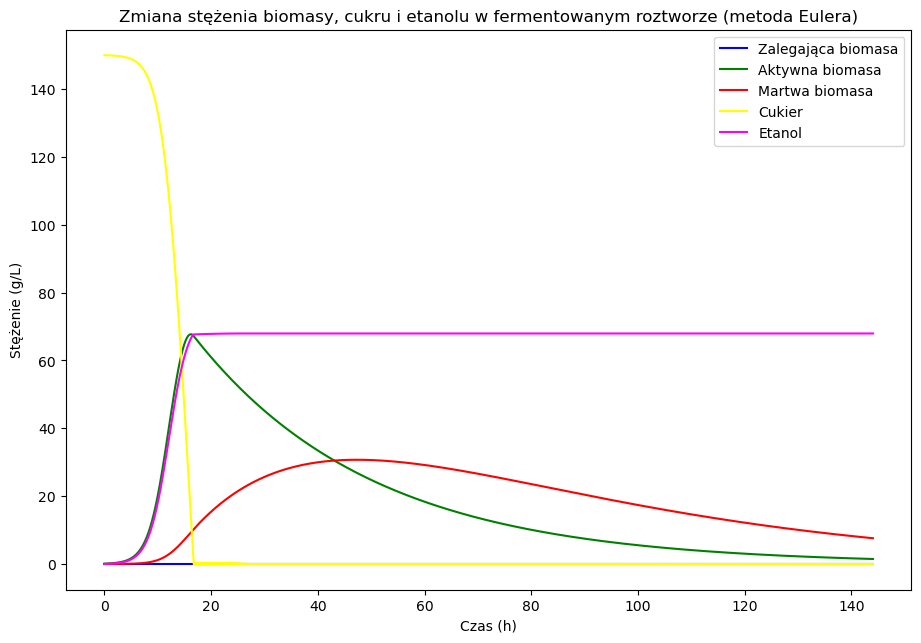

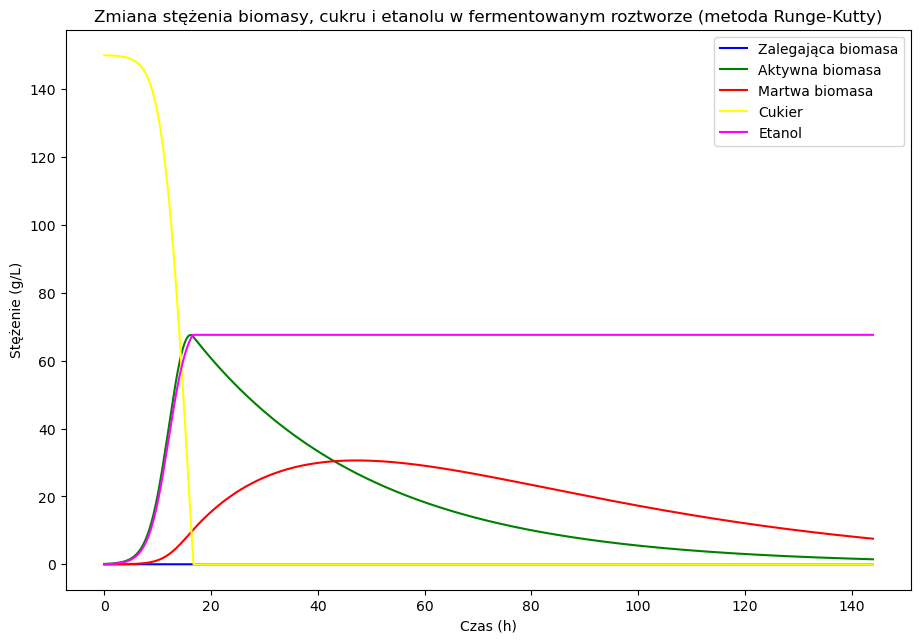

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def model_fermentacji(t, X_L, X_A, X_D, S, E):
    mu_X = mu_X0*S /(0.5*S0 + E)
    mu_SD = mu_SD0*0.5*S0 /(0.5*S0 + E)
    mu_S = mu_S0 * S /(K_S + S)
    mu_E = mu_E0 * S /(K_E + S) * (1 - E/(0.5 * S0))
        
    dX_L_dt = -mu_L * X_L
    dX_A_dt = mu_X * X_A + mu_L * X_L - mu_DT * X_A
    dX_D_dt = mu_DT * X_A - mu_SD * X_D
    dS_dt = -mu_S * X_A
    dE_dt = mu_E * X_A
    return np.array([dX_L_dt, dX_A_dt, dX_D_dt, dS_dt, dE_dt])

#Warunki początkowe
mu_L = 0.03
mu_S0 = 0.4
K_S = 0.2
mu_X0 = 0.3
mu_DT = 0.03
mu_SD0 = 0.05
K_E = 3
mu_E0 = 0.5

S0 = 150
X_L0 = 0
X_A0 = 0.1
X_D0 = 0
E0 = 0

#Metoda Eulera
t0 = 0
h = 0.02
t_max = 144

def rozwiazanie_euler(t0, h, t_max, X_L0, X_A0, X_D0, S0, E0):
    X_L = [X_L0]
    X_A = [X_A0]
    X_D = [X_D0]
    S = [S0]
    E = [E0]
    T = [t0]
    
    k = 0
    t = t0
    while t <= t_max:
        dX_L_dt, dX_A_dt, dX_D_dt, dS_dt, dE_dt = model_fermentacji(t, X_L[k], X_A[k], X_D[k], S[k], E[k])
        X_L.append(X_L[k] + dX_L_dt * h)
        X_A.append(X_A[k] + dX_A_dt * h)
        X_D.append(X_D[k] + dX_D_dt * h)
        S.append(S[k] + dS_dt * h)
        E.append(E[k] + dE_dt * h)
        t += h
        k += 1
        T.append(t)
    return T, X_L, X_A, X_D, S, E

def wykres(T, X_L, X_A, X_D, S, E, tytul_wykresu):
    plt.figure(figsize=(24,16))
    plt.subplot(2, 2, 2)
    plt.plot(T, X_L, label='Zalegająca biomasa', color='blue')
    plt.plot(T, X_A, label='Aktywna biomasa', color='green')
    plt.plot(T, X_D, label='Martwa biomasa', color='red')
    plt.plot(T, S, label='Cukier', color='yellow')
    plt.plot(T, E, label='Etanol', color='magenta')
    plt.xlabel('Czas (h)')
    plt.ylabel('Stężenie (g/L)')
    plt.title(tytul_wykresu)
    plt.legend()
    plt.show()

tytul = "Zmiana stężenia biomasy, cukru i etanolu w fermentowanym roztworze (metoda Eulera)"
T, X_L, X_A, X_D, S, E = rozwiazanie_euler(t0, h, t_max, X_L0, X_A0, X_D0, S0, E0)
wykres(T, X_L, X_A, X_D, S, E, tytul)

def runge_kutty(f, t, y, h):
    k1 = f(t, *y)
    k2 = f(t + 0.5*h, *(y + 0.5* h * k1))
    k3 = f(t + 0.5*h, *(y + 0.5*h * k2))
    k4 = f(t + h, *(y + h * k3))
    return y + (h/6) * (k1 + 2*k2 + 2*k3 +k4)

def rozwiazanie_runge_kutty(t0, h, t_max, X_L0, X_A0, X_D0, S0, E0):
    liczba_krokow = int(t_max/h) + 1
    wartosci = np.zeros((liczba_krokow, 5))
    wartosci[0, :] = [X_L0, X_A0, X_D0, S0, E0]
    t = t0
    T = [t0]
    for i in range(1, liczba_krokow):
        wartosci[i, :] = runge_kutty(model_fermentacji, t, wartosci[i-1, :], h)
        t += h
        T.append(t)
    X_L = wartosci[:, 0]
    X_A = wartosci[:, 1]
    X_D = wartosci[:, 2]
    S = wartosci[:, 3]
    E = wartosci[:, 4]
    return T, X_L, X_A, X_D, S, E

tytul = "Zmiana stężenia biomasy, cukru i etanolu w fermentowanym roztworze (metoda Runge-Kutty)"
T, X_L, X_A, X_D, S, E = rozwiazanie_runge_kutty(t0, h, t_max, X_L0, X_A0, X_D0, S0, E0)
wykres(T, X_L, X_A, X_D, S, E, tytul)

## 4. Przedstawienie wyników

## Bibliografia